**The food delivery time prediction model is essential in the food delivery industry, where timely and accurate deliveries are critical for customer satisfaction and overall experience.**

**To create an effective prediction model, we started by meticulously cleaning the dataset to eliminate errors and inconsistencies, ensuring the reliability and accuracy of the predictions.**

**Next, we used feature engineering to derive valuable insights from the dataset. By considering factors such as the delivery person's age, ratings, location coordinates, and time-related variables, we aimed to identify key elements that affect delivery time. These engineered features enhanced the model's predictive power.**

**We then built the predictive model using regression algorithms like linear regression, decision tree, random forest, and XGBoost. The model was trained on a subset of the dataset using cross-validation techniques to ensure robustness. We evaluated the model's accuracy with metrics such as mean squared error (MSE) and R-squared (R2) score.**

**This food delivery time prediction model enables businesses to optimize their operations and enhance the overall delivery experience for their customers.**

In [38]:
#installing libraries
%pip install geopy
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [39]:
#data analytics libraries
import numpy as np
import pandas as pd

#data visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns
#for statistical analysis
import scipy.stats as stats
import statistics
#for finding distance between latitude and longitude
from geopy.distance import geodesic
#for training and testing data
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
#for encoding categorical variables
from sklearn.preprocessing import LabelEncoder,StandardScaler 
#for training models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
#for evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Load and Understand Data

In [40]:
df_train=pd.read_csv("train.csv")
df_train.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [41]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [42]:
print("Train Dataset :",df_train.shape)

Train Dataset : (45593, 20)


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [44]:
#check statistical values for fields  with numerical datatype
df_train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [45]:
#check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


### Observations
1. There are null values present in Time_Ordered Column
2. Data Formatting will be required for Weatherconditions & Time_taken(min) column.32. Both numerical & categorical features are present.4
3. ID & Delivery_person_ID will not be used to build the model.

In [46]:
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_perso

# Data Cleaning

In [47]:
#Update Coulmn Names

#Rename weather conditions column
def update_column_name(df):
    df.rename(columns={'Weatherconditions':'weather_condition'},inplace=True)

update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'weather_condition', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [48]:
def test_func(x):
    return int(x.split(' ')[1].strip())

test_func("(min) 33")

33

In [49]:
#Extract relevant values from column
def extract_column_value(df):
    # Extract numbers from Time_taken(min)
    df['Time_taken(min)'] = (
        df['Time_taken(min)']
        .astype(str)
        .str.extract(r'(\d+)')
        .astype(int)
    )
    
    # Extract last word for weather_condition
    df['weather_condition'] = (
        df['weather_condition']
        .astype(str)
        .str.strip()
        .str.split()
        .str[-1]
    )
    
    # Extract city code before "RES"
    df['City_code'] = (
        df['Delivery_person_ID']
        .astype(str)
        .str.split("RES")
        .str[0]
    )

    
extract_column_value(df_train)
df_train[['Time_taken(min)','weather_condition','City_code']].head()

,Time_taken(min),weather_condition,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [28]:
#Drop the columns which are not used for building model
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
print("Before No. of Columns: ",df_train.shape[1])
drop_columns(df_train)
print("After Droping (Columns): ",df_train.shape[1])

Before No. of Columns:  21
After Droping (Columns):  19


In [50]:
#Check for duplicate values
if(len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else: 
    print("There is no duplicate value present")

There is no duplicate value present


In [56]:
#Update datatypes
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

update_datatype(df_train)
df_train[['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Order_Date']].head()

,Delivery_person_Age,Delivery_person_Ratings,multiple_deliveries,Order_Date
0,37.0,4.9,0.0,2022-03-19
1,34.0,4.5,1.0,2022-03-25
2,23.0,4.4,1.0,2022-03-19
3,38.0,4.7,1.0,2022-04-05
4,32.0,4.6,1.0,2022-03-26


In [57]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN',float(np.nan),regex=True,inplace=True)

convert_nan(df_train)

In [58]:
#check null values
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
weather_condition               616
Road_traffic_density            601
Festival                        228
ID                                0
Vehicle_condition                 0
Time_taken(min)                   0
Type_of_vehicle                   0
Type_of_order                     0
Time_Order_picked                 0
Delivery_person_ID                0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
City_code                         0
dtype: int64

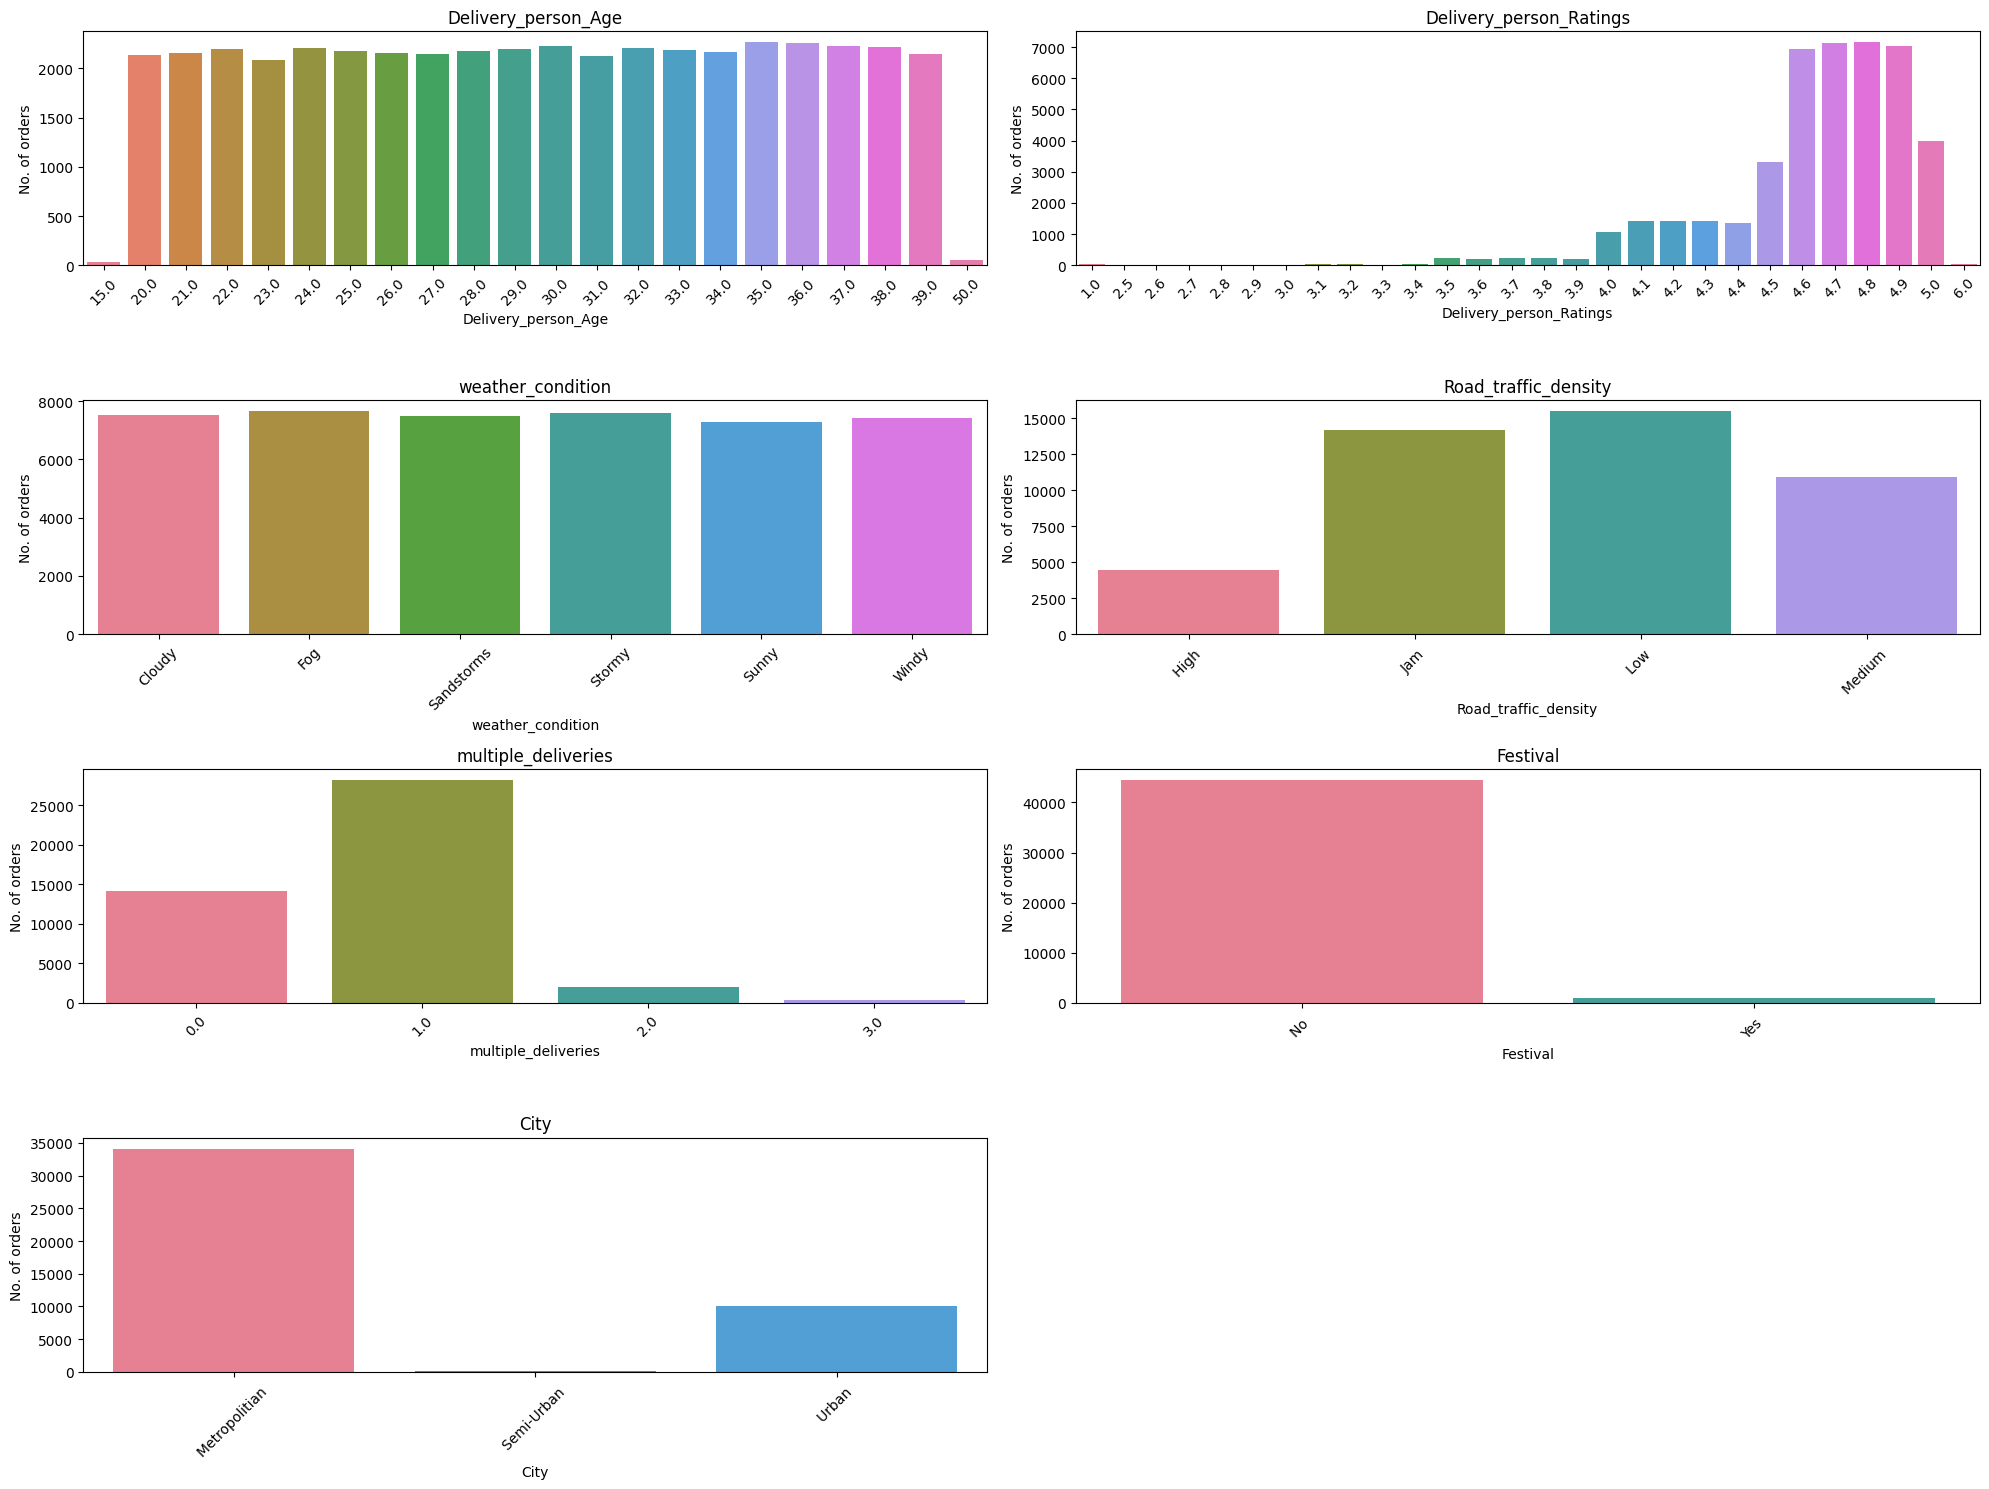

In [61]:
#Lets explore the columns that have null values
cols=['Delivery_person_Age','Delivery_person_Ratings','weather_condition','Road_traffic_density','multiple_deliveries','Festival','City']
num_plot=len(cols)
num_rows=(num_plot//2)+(num_plot%2)
fig,axes=plt.subplots(num_rows,2,figsize=(20,15))

for i, column_name in enumerate(cols):
    row=i//2
    col=i%2

    ax=axes[row,col]
    sns.countplot(data=df_train,x=column_name,order=df_train[column_name].value_counts().sort_index().index,ax=ax,palette="husl")

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x',rotation=45)

if num_plot%2!=0:
    fig.delaxes(axes[-1,-1])

plt.tight_layout()
plt.show()

In [64]:
#Handle null values 
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']),inplace=True)
    df['weather_condition'].fillna(np.random.choice(df['weather_condition']),inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0],inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0],inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0],inplace=True)
    df['City'].fillna(df['City'].mode()[0],inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(),inplace=True)

handle_null_values(df_train)
df_train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
weather_condition                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

# Feature Engineering

In [65]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,1,2022,5,0,0,0,0,0,0,1
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,1,2022,4,0,0,0,0,0,0,0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,1,2022,5,0,0,0,0,0,0,1
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,...,2,2022,1,0,0,0,0,0,0,0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,1,2022,5,0,0,0,0,0,0,1


In [68]:
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,weather_condition,Road_traffic_density,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,...,2022,5,0,0,0,0,0,0,1,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,...,2022,4,0,0,0,0,0,0,0,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,...,2022,5,0,0,0,0,0,0,1,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,...,2022,1,0,0,0,0,0,0,0,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,...,2022,5,0,0,0,0,0,0,1,15.0


In [67]:
#Calculate time difference
def calculate_time_diff(df):
    #Find the difference between ordered time & picked time
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

    #Calculation done to resolve issue when:
    #picked time earlier than ordered time → crossed midnight
    #for example order time is 1:00 pm while order picked up time is 9:00 am next day
    df['Time_Order_picked_formatted'] = df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_picked']
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']

    df['Time_Order_picked_formatted']=pd.to_datetime(df['Time_Order_picked_formatted'])

    #Calculating order preparation time
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)


calculate_time_diff(df_train)
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,weather_condition,Road_traffic_density,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,...,2022,5,0,0,0,0,0,0,1,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,...,2022,4,0,0,0,0,0,0,0,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,...,2022,5,0,0,0,0,0,0,1,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,...,2022,1,0,0,0,0,0,0,0,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,...,2022,5,0,0,0,0,0,0,1,15.0


In [73]:
#calculate distance between restaurant  location & delivery location
def calculate_distance(df): 
    #Initialize a column 'distance' with zeros
    df['distance']=np.zeros(len(df))
    #Extract restaurant coordinates and delivery location coordinates into an array
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    #Calculate geodesic distance for each pair of coordinates
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance'] = df['distance'].round(2)

calculate_distance(df_train)
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,weather_condition,Road_traffic_density,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,...,5,0,0,0,0,0,0,1,15.0,3.0207366434610647 km
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,...,4,0,0,0,0,0,0,0,5.0,20.143736910348597 km
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,...,5,0,0,0,0,0,0,1,15.0,1.549692932239404 km
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,...,1,0,0,0,0,0,0,0,10.0,7.774496620087613 km
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,...,5,0,0,0,0,0,0,1,15.0,6.197897916874956 km
